In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns  # 시각화 라이브러리


In [2]:
train = pd.read_csv('data/data.csv', index_col = 'day_text')

### 결측치 채우기

In [3]:
#결측치 확인
train.isnull().sum()

time_text         0
team_text         0
location          0
H_text            0
HR_text           0
S_text            0
ST_text           0
DU_text           0
ER_text           0
result_text       0
temp              0
rain           7212
wind              2
d_wind            2
humidity          0
atmosphere        0
surface           2
dtype: int64

In [4]:
#결측치 0으로 채우기
train['rain'] = train['rain'].fillna('0')
train['wind'] = train['wind'].fillna('0')
train['d_wind'] = train['d_wind'].fillna('0')
train['surface'] = train['surface'].fillna('0')

In [5]:
train.isnull().sum()

time_text      0
team_text      0
location       0
H_text         0
HR_text        0
S_text         0
ST_text        0
DU_text        0
ER_text        0
result_text    0
temp           0
rain           0
wind           0
d_wind         0
humidity       0
atmosphere     0
surface        0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_text    10230 non-null  object 
 1   team_text    10230 non-null  object 
 2   location     10230 non-null  object 
 3   H_text       10230 non-null  int64  
 4   HR_text      10230 non-null  int64  
 5   S_text       10230 non-null  int64  
 6   ST_text      10230 non-null  int64  
 7   DU_text      10230 non-null  int64  
 8   ER_text      10230 non-null  int64  
 9   result_text  10230 non-null  int64  
 10  temp         10230 non-null  float64
 11  rain         10230 non-null  object 
 12  wind         10230 non-null  object 
 13  d_wind       10230 non-null  object 
 14  humidity     10230 non-null  int64  
 15  atmosphere   10230 non-null  float64
 16  surface      10230 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 1.4+ MB


In [7]:
train['rain'] = train['rain'].astype('float64')
train['wind'] = train['wind'].astype('float64')
train['d_wind'] = train['d_wind'].astype('float64')
train['atmosphere'] = train['atmosphere'].astype('float64')
train['surface'] = train['surface'].astype('float64')

### 데이터 7:3으로 나누기

In [8]:
#7대 3으로 데이터 나누기
X = train.drop('result_text',axis = 1)
y = train['result_text']

X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.2,
                                                  stratify = y,
                                                  random_state = 1)

In [9]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(8184, 16) (8184,) (2046, 16) (2046,)


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8184 entries, 8.23금 to 5.8수
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_text   8184 non-null   object 
 1   team_text   8184 non-null   object 
 2   location    8184 non-null   object 
 3   H_text      8184 non-null   int64  
 4   HR_text     8184 non-null   int64  
 5   S_text      8184 non-null   int64  
 6   ST_text     8184 non-null   int64  
 7   DU_text     8184 non-null   int64  
 8   ER_text     8184 non-null   int64  
 9   temp        8184 non-null   float64
 10  rain        8184 non-null   float64
 11  wind        8184 non-null   float64
 12  d_wind      8184 non-null   float64
 13  humidity    8184 non-null   int64  
 14  atmosphere  8184 non-null   float64
 15  surface     8184 non-null   float64
dtypes: float64(6), int64(7), object(3)
memory usage: 1.1+ MB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 7.31수 to 8.1토
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_text   2046 non-null   object 
 1   team_text   2046 non-null   object 
 2   location    2046 non-null   object 
 3   H_text      2046 non-null   int64  
 4   HR_text     2046 non-null   int64  
 5   S_text      2046 non-null   int64  
 6   ST_text     2046 non-null   int64  
 7   DU_text     2046 non-null   int64  
 8   ER_text     2046 non-null   int64  
 9   temp        2046 non-null   float64
 10  rain        2046 non-null   float64
 11  wind        2046 non-null   float64
 12  d_wind      2046 non-null   float64
 13  humidity    2046 non-null   int64  
 14  atmosphere  2046 non-null   float64
 15  surface     2046 non-null   float64
dtypes: float64(6), int64(7), object(3)
memory usage: 271.7+ KB


<AxesSubplot:>

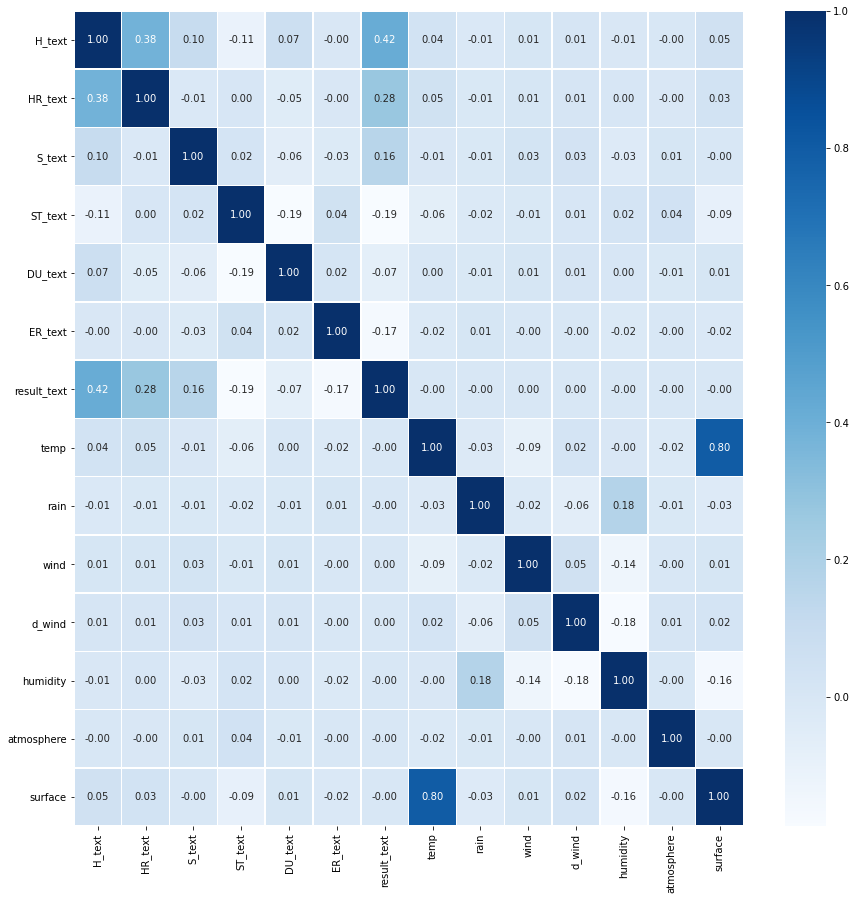

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 데이터 탐색(result_text 의 빈도가 높은 경우를 찾기)

In [13]:
test_result = train[['team_text', 'result_text', 'location']].groupby(['team_text','location']).count()
test_result

result_text
team_text location             
KIA 타이거즈  광주                530
          대구                 61
          대전                 67
          부산                 53
          서울                183
          수원                 43
          인천                 66
          창원                 55
LG 트윈스    광주                 67
          대구                 63
          대전                 64
          부산                 57
          서울                659
          수원                 42
          인천                 59
          창원                 58
NC 다이노스   광주                 60
          대구                 56
          대전                 51
          부산                 59
          서울                156
          수원                 38
          인천                 51
          창원                474
SK 와이번스   광주                 53
          대구                 67
          대전                 56
          부산                 68
          서울                193
          수원                 36
          인천                540
          창원                 55
kt wiz    광주                 34
          대구                 39
          대전                 43
          부산                 38
          서울                131
          수원                369
          인천                 48
          창원                 42
두산 베어스    광주                 60
          대구                 61
          대전                 62
          부산                 61
          서울                666
          수원                 45
          인천                 60
          창원                 54
롯데 자이언츠   광주                 67
          대구                 52
          대전                 56
          부산                533
          서울                190
          수원                 40
          인천                 65
          창원                 57
삼성 라이온즈   광주                 64
          대구                530
          대전                 67
          부산                 67
          서울                186
          수원                 43
          인천                 63
          창원                 44
키움 히어로즈   광주                 59
          대구                 64
          대전                 63
          부산                 63
          서울                668
          수원                 45
          인천                 62
          창원                 58
한화 이글스    광주                 66
          대구                 67
          대전                529
          부산                 67
          서울                188
          수원                 37
          인천                 66
          창원                 51

### 온도 5도 기준으로 나눠서 시각화
- 어느 온도에서 야구 경기가 많이 이루어졌는지 볼 수 있음

In [14]:
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
train['temp'] = pd.cut(train['temp'], bins = bins, labels = labels)

<AxesSubplot:xlabel='temp', ylabel='count'>

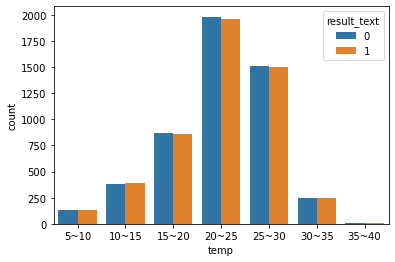

In [15]:
sns.countplot(data = train, x = 'temp', hue='result_text')

In [16]:
print(train['rain'])

day_text
4.2화     0.0
4.2화     0.0
4.2화     0.0
4.2화     0.0
4.2화     0.0
        ... 
9.30일    0.0
9.30일    0.0
9.30일    0.0
9.30일    0.0
9.30일    0.0
Name: rain, Length: 10230, dtype: float64


### 강수량 3mm 를 기준으로 나눠서 시각화

In [17]:
bins = [0,4,7,10,13,16,19]  # 구간 만들기
labels = ['0~3', '3~6', '6~9', '9~12', '12~15', '15~18']
train['rain'] = pd.cut(train['rain'], bins = bins, labels = labels)

<AxesSubplot:xlabel='rain', ylabel='count'>

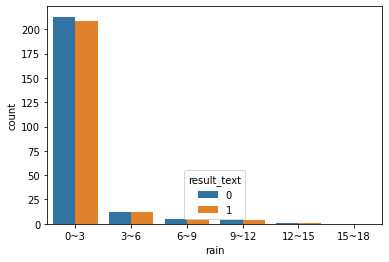

In [18]:
sns.countplot(data = train, x = 'rain', hue='result_text')

### 습도 10% 를 기준으로 나눠서 시각화

In [19]:
bins = [0,11,21,31,41,51,61,71,81,91,101]  # 구간 만들기
labels = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']
train['humidity'] = pd.cut(train['humidity'], bins = bins, labels = labels)

<AxesSubplot:xlabel='humidity', ylabel='count'>

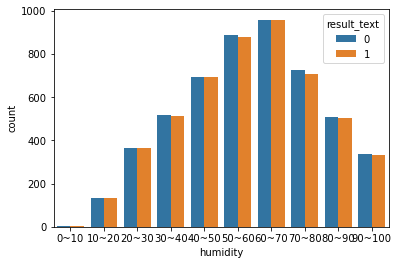

In [20]:
sns.countplot(data = train, x = 'humidity', hue='result_text')

### 원핫인코딩

In [21]:
X_train.drop('time_text', axis = 1 , inplace = True)

C:\Users\smhrd\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
X_test.drop('time_text', axis = 1, inplace = True)

In [23]:
cat_feature = ['team_text','location']

In [24]:
for i in cat_feature:
    dummy = pd.get_dummies(X_train[i], prefix = i)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace = True)

In [25]:
for i in cat_feature:
    dummy = pd.get_dummies(X_test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 7.31수 to 8.1토
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              2046 non-null   int64  
 1   HR_text             2046 non-null   int64  
 2   S_text              2046 non-null   int64  
 3   ST_text             2046 non-null   int64  
 4   DU_text             2046 non-null   int64  
 5   ER_text             2046 non-null   int64  
 6   temp                2046 non-null   float64
 7   rain                2046 non-null   float64
 8   wind                2046 non-null   float64
 9   d_wind              2046 non-null   float64
 10  humidity            2046 non-null   int64  
 11  atmosphere          2046 non-null   float64
 12  surface             2046 non-null   float64
 13  team_text_KIA 타이거즈  2046 non-null   uint8  
 14  team_text_LG 트윈스    2046 non-null   uint8  
 15  team_text_NC 다이노스   2046 non-null   uint8  
 16  team_te

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8184 entries, 8.23금 to 5.8수
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              8184 non-null   int64  
 1   HR_text             8184 non-null   int64  
 2   S_text              8184 non-null   int64  
 3   ST_text             8184 non-null   int64  
 4   DU_text             8184 non-null   int64  
 5   ER_text             8184 non-null   int64  
 6   temp                8184 non-null   float64
 7   rain                8184 non-null   float64
 8   wind                8184 non-null   float64
 9   d_wind              8184 non-null   float64
 10  humidity            8184 non-null   int64  
 11  atmosphere          8184 non-null   float64
 12  surface             8184 non-null   float64
 13  team_text_KIA 타이거즈  8184 non-null   uint8  
 14  team_text_LG 트윈스    8184 non-null   uint8  
 15  team_text_NC 다이노스   8184 non-null   uint8  
 16  team_te

In [28]:
set(X_train.columns) - set(X_test.columns)

set()

### KNN 모델

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.60354307, 0.58766035, 0.60354307, 0.57483201, 0.599022  ])

In [30]:
result.mean()

0.5937201004282089

#### KNN Scaler 적용

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)  # 평균과 표준편차로 scaling 한 값을 컴퓨터가 기억

StandardScaler()

In [33]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[-0.1502618 , -0.86961722, -0.76059392, ..., -0.27898897,
        -0.34066219,  3.09634012],
       [-1.49277549,  0.07452543,  0.24745477, ..., -0.27898897,
         2.93545929, -0.32296194],
       [ 0.92374916,  1.01866809, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       ...,
       [ 1.46075464,  3.85109607, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [ 1.72925738,  1.01866809,  1.25550345, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [-1.49277549,  1.96281075,  1.25550345, ..., -0.27898897,
        -0.34066219, -0.32296194]])

In [34]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.92374916,  1.01866809, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [ 0.65524642,  1.01866809,  0.24745477, ..., -0.27898897,
         2.93545929, -0.32296194],
       [-1.76127823, -0.86961722, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       ...,
       [ 0.65524642,  0.07452543, -0.76059392, ..., -0.27898897,
        -0.34066219,  3.09634012],
       [-0.1502618 ,  0.07452543, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [ 0.11824094,  1.01866809, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194]])

In [35]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 5)
result

array([0.66340867, 0.68478925, 0.67745877, 0.67135003, 0.67481663])

In [36]:
result.mean()

0.6743646691051822

#### KNN Scaler 적용

In [37]:
y_pred = knn_model.fit(transform_X_train, y_train).predict(transform_X_test)

In [38]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (transform_X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 660


In [39]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.68


### Decision Tree 모델

In [40]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [41]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.65567766, 0.66666667, 0.65934066, 0.69474969, 0.67114914,
       0.68215159, 0.66625917, 0.67481663, 0.68337408, 0.67848411])

In [42]:
result.mean()

0.6732669395261082

In [43]:
y_pred = tree_model.fit(X_train, y_train).predict(X_test)

In [44]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 655


In [45]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.68


### Naive Bayes 분류 모델

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb = GaussianNB()
     

In [48]:
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [49]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 616


In [50]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.70


### SVM 분류 모델

In [51]:
svm_model = SVC(kernel='rbf', C=300, gamma=0.0001)

In [52]:
y_pred = svm_model.fit(X_train, y_train).predict(X_test)

In [53]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.73


### XGBOOST 모델

In [54]:
!pip install xgboost

You should consider upgrading via the 'c:\users\smhrd\anaconda\python.exe -m pip install --upgrade pip' command.


In [55]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(n_estimators = 5000, learning_rate = 0.001, max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[17:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\smhrd\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\smhrd\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [57]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != xgb_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 514


In [58]:
print("예측 정확도: {:.2f}".format(np.mean(xgb_pred == y_test)))

예측 정확도: 0.75


### Logistic Regression 모델

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [60]:
train_data, train_label = shuffle(X_train, y_train, random_state = 5)

In [61]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(X_test)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [62]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

C:\Users\smhrd\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  72.07 %
Accuracy :  50.2 %
Accuracy :  66.29 %
Accuracy :  100.0 %
Accuracy :  68.76 %


In [63]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != log_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 518


In [64]:
print("예측 정확도: {:.2f}".format(np.mean(log_pred == y_test)))

예측 정확도: 0.75


### Random Forest 모델

In [65]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != rf_pred ).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 558


In [66]:
print("예측 정확도: {:.2f}".format(np.mean(rf_pred == y_test)))

예측 정확도: 0.73


In [67]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != knn_pred_4 ).sum()))
print("예측 정확도: {:.2f}".format(np.mean(knn_pred_4 == y_test)))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 1030
예측 정확도: 0.50


In [68]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != svm_pred ).sum()))
print("예측 정확도: {:.2f}".format(np.mean(svm_pred == y_test)))


총 승패 갯수 2046 에서 틀린 예측 갯수 : 1019
예측 정확도: 0.50


### Gradient Boosting 

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [70]:
gb = GradientBoostingClassifier(random_state = 0 )
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [71]:
pred = gb.predict(X_test)
print("정확도 : {0: .3f}".format(accuracy_score(y_test,pred)))

정확도 :  0.749


In [72]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != pred).sum()))
print("예측 정확도: {:.2f}".format(np.mean(pred == y_test)))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 513
예측 정확도: 0.75


### 테스트 세트 예측